In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.simplefilter("ignore")

In [2]:
df=pd.read_csv("dataset.csv")
df.sample(7)

,systemCodeNumber,capacity,occupancy,lastUpdated
1579,BHMBCCPST01,317,174,2016-10-18 15:27:59
4539,BHMBCCTHL01,387,306,2016-11-11 12:27:21
29033,Others-CCCPS133,4675,905,2016-12-13 08:02:51
5711,BHMBRCBRG01,1010,686,2016-11-10 14:27:13
18807,BHMNCPPLS01,450,106,2016-12-09 15:29:34
23315,NIA Car Parks,1268,181,2016-11-10 16:00:15
13421,BHMNCPHST01,1200,535,2016-11-12 15:27:27


In [3]:
df["lastUpdated"]=pd.to_datetime(df["lastUpdated"])
df["day"]=(df["lastUpdated"]).dt.day
df["month"]=(df["lastUpdated"]).dt.month
df["year"]=(df["lastUpdated"]).dt.year
df["time"]=(df["lastUpdated"]).dt.time
del df["lastUpdated"]

In [4]:
df.isnull().sum()

systemCodeNumber    0
capacity            0
occupancy           0
day                 0
month               0
year                0
time                0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35717 entries, 0 to 35716
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   systemCodeNumber  35717 non-null  object
 1   capacity          35717 non-null  int64 
 2   occupancy         35717 non-null  int64 
 3   day               35717 non-null  int64 
 4   month             35717 non-null  int64 
 5   year              35717 non-null  int64 
 6   time              35717 non-null  object
dtypes: int64(5), object(2)
memory usage: 1.9+ MB


In [6]:
df.sample(5)

,systemCodeNumber,capacity,occupancy,day,month,year,time
3709,BHMBCCSNH01,863,468,10,12,2016,10:29:38
20411,Broad Street,690,612,17,10,2016,11:04:20
26333,Others-CCCPS105a,2009,1445,7,12,2016,14:59:22
20968,Broad Street,690,145,19,11,2016,10:31:15
11073,BHMEURBRD02,220,183,28,11,2016,09:28:24


Text(0.5, 1.0, 'Yoğunluk')

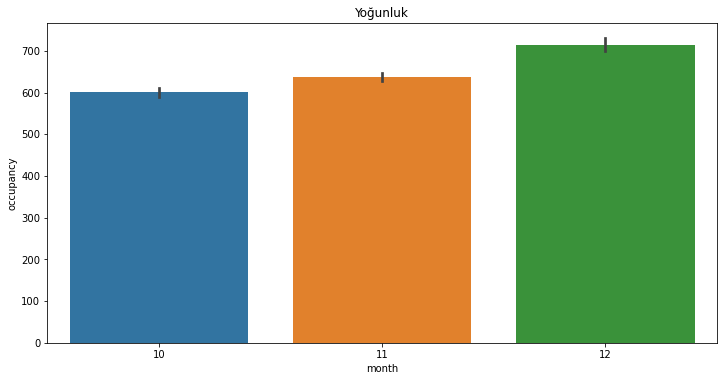

In [7]:
fig=plt.figure(figsize=(12,20))

ax=fig.add_subplot(311)
ax=sns.barplot(x=df['month'],y=df['occupancy'])
ax.set_title("Yoğunluk")

Text(0.5, 1.0, 'Yoğunluk')

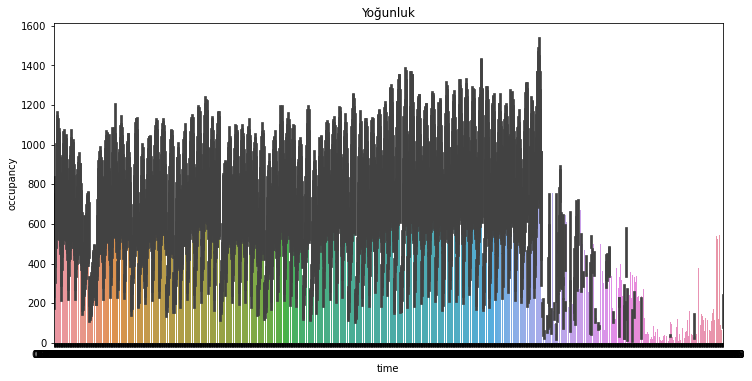

In [8]:
fig=plt.figure(figsize=(12,20))

ax=fig.add_subplot(311)
ax=sns.barplot(x=df['time'],y=df['occupancy'])
ax.set_title("Yoğunluk")

Text(0.5, 1.0, 'Yoğunluk')

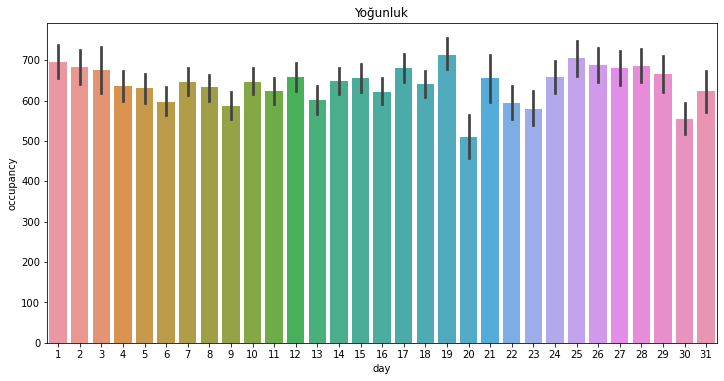

In [9]:
fig=plt.figure(figsize=(12,20))

ax=fig.add_subplot(311)
ax=sns.barplot(x=df['day'],y=df['occupancy'])
ax.set_title("Yoğunluk")

In [10]:
df["systemCodeNumber"].replace('[a-zA-Z@_!#$%^&*()<>?/\|}{~:]'," ",inplace=True,regex=True)

In [11]:
df

,systemCodeNumber,capacity,occupancy,day,month,year,time
0,01,577,61,4,10,2016,07:59:42
1,01,577,64,4,10,2016,08:25:42
2,01,577,80,4,10,2016,08:59:42
3,01,577,107,4,10,2016,09:32:46
4,01,577,150,4,10,2016,09:59:48
...,...,...,...,...,...,...,...
35712,,1920,1517,19,12,2016,14:30:33
35713,,1920,1487,19,12,2016,15:03:34
35714,,1920,1432,19,12,2016,15:29:33
35715,,1920,1321,19,12,2016,16:03:35


In [12]:
df=df.drop(["time"],axis=1)

In [13]:
df

,systemCodeNumber,capacity,occupancy,day,month,year
0,01,577,61,4,10,2016
1,01,577,64,4,10,2016
2,01,577,80,4,10,2016
3,01,577,107,4,10,2016
4,01,577,150,4,10,2016
...,...,...,...,...,...,...
35712,,1920,1517,19,12,2016
35713,,1920,1487,19,12,2016
35714,,1920,1432,19,12,2016
35715,,1920,1321,19,12,2016


In [14]:
x=df.drop("occupancy",axis=1)
y=df["occupancy"]

In [15]:
x=pd.get_dummies(x,drop_first=True)

In [16]:
def regression(x,y):
    from sklearn.linear_model import LinearRegression
    from sklearn.linear_model import Ridge,Lasso
    from sklearn.linear_model import ElasticNet
    from sklearn.tree import ExtraTreeRegressor
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.neighbors import KNeighborsRegressor
    
    from sklearn.model_selection import train_test_split

    from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
    
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    L=LinearRegression()
    R=Ridge()
    Lass=Lasso()
    E=ElasticNet()
    ExTree=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    KN=KNeighborsRegressor()
    
    algos=[L,R,Lass,E,ExTree,GBR,KN]
    algo_names=['LinearRegression','Ridge','Lasso','ElasticNet','ExtraTreeRegressor','GradientBoostingRegressor','KNeighborsRegressor']
    r_squared=[]
    rmse=[]
    mae=[]
    
    result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
    
    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)
        r_squared.append(r2_score(y_test,item.predict(x_test)))
        rmse.append((mean_squared_error(y_test,item.predict(x_test)))**.5)
        mae.append(mean_absolute_error(y_test,item.predict(x_test)))
        
    result.R_Squared=r_squared
    result.RMSE=rmse
    result.MAE=mae
        
    return result.sort_values('R_Squared',ascending=False)

In [17]:
regression(x,y)

,R_Squared,RMSE,MAE
ExtraTreeRegressor,0.808518,289.205798,167.119711
KNeighborsRegressor,0.780626,309.553151,174.878191
GradientBoostingRegressor,0.742699,335.245732,210.332380
Ridge,0.718063,350.928439,228.255188
LinearRegression,0.718040,350.943232,228.235741
Lasso,0.717674,351.170657,230.257620
ElasticNet,0.621172,406.784003,282.242923
